In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [2]:
df = pd.read_json("../data/IMDB_reviews.json", lines=True)
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [4]:
df.describe()

,rating
count,573913.000000
mean,6.954254
std,2.956295
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [5]:
columns = ["review_text","is_spoiler"]
df = df[columns]
df.head()

,review_text,is_spoiler
0,"In its Oscar year, Shawshank Redemption (writt...",True
1,The Shawshank Redemption is without a doubt on...,True
2,I believe that this film is the best story eve...,True
3,"**Yes, there are SPOILERS here**This film has ...",True
4,At the heart of this extraordinary movie is a ...,True


In [6]:
true_count = df['is_spoiler'].sum()
false_count = len(df) - true_count
true_count,false_count

(150924, 422989)

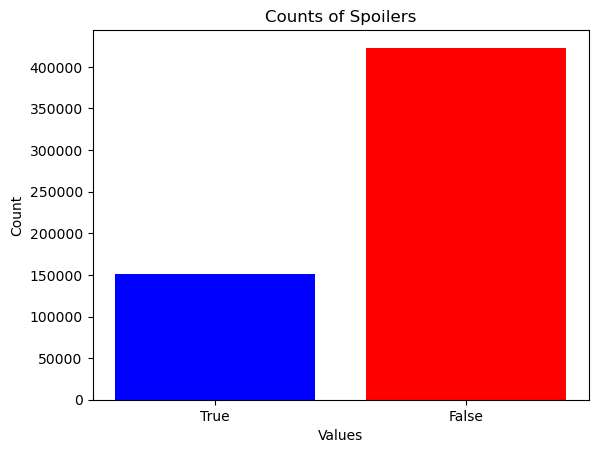

In [7]:
counts = [true_count, false_count]
labels = ['True', 'False']

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Counts of Spoilers')
plt.show()

In [8]:
df["review_text"].str.len().mean()

1460.5535246631457

In [9]:
df['is_spoiler'] = df['is_spoiler'].astype(int)

In [10]:
df.rename(columns = {'review_text':'text', 'is_spoiler':'label'}, inplace = True)

In [11]:
large_df, small_df = train_test_split(df, test_size=0.1, stratify=df['label'])

In [12]:
small_df.reset_index(drop=True)

,text,label
0,This is as good as one might hope for in a mov...,0
1,I thought that this film as a great movie!It i...,0
2,I loved this movie - Denzel conveys so much po...,1
3,The movie was totally fun and superb. Amongst ...,0
4,"Basically,\nScientists discover a way to shrin...",1
...,...,...
57387,Marvel comics has unleashed superhero movies f...,0
57388,I have just finished watching this film for th...,1
57389,This is a film that well deserves a 15 out of ...,1
57390,Billy Bob Thornton plays a criminal Santa Clau...,0


In [13]:
X = small_df["text"]
y = small_df["label"]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
train_data = pd.concat([train_X, train_y], axis=1)
valid_data = pd.concat([valid_X, valid_y], axis=1)

In [15]:
train_data.head()

,text,label
28851,Well if you completely enjoy movies with twist...,0
284758,"What was up with the low cut shirts, anyway? W...",0
283169,"The Perfect Storm takes a real life event, and...",0
428043,I was forced to watch this movie by my girlfri...,0
390532,I watched the Dukes of Hazzard as a boy and th...,0


In [16]:
train_data.to_csv("../data/train.csv")
valid_data.to_csv("../data/valid.csv")

In [17]:
len(train_data)

45913

In [18]:
len(valid_data)

11479